In [1]:
import json
from pathlib import Path
import os
import time

import fitz
import pandas as pd

In [2]:
from pydantic_settings import BaseSettings, SettingsConfigDict

class Settings(BaseSettings):
    model_config = SettingsConfigDict(
        env_file="../.env", env_file_encoding="utf-8", extra="ignore"
    )
    data_dir: str
    docling_model_dir: str
    
settings = Settings()
os.environ["HF_HOME"] = settings.docling_model_dir

In [3]:
import sys
sys.path.append("src")

# Load Converter

In [4]:
# Import docling
from docling.datamodel.base_models import InputFormat
from docling.document_converter import (
    DocumentConverter,
    PdfFormatOption,
    WordFormatOption,
)
from docling.pipeline.simple_pipeline import SimplePipeline
from docling.pipeline.standard_pdf_pipeline import StandardPdfPipeline
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.backend.docling_parse_v2_backend import DoclingParseV2DocumentBackend
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend

from docling.datamodel.document import ConversionResult

IMAGE_RESOLUTION_SCALE = 2.0

pdf_format_options = PdfPipelineOptions()
pdf_format_options.images_scale = IMAGE_RESOLUTION_SCALE
pdf_format_options.generate_page_images = True
pdf_format_options.generate_picture_images = True

pdf_format_options.do_ocr = False
# pdf_format_options.do_table_structure = False
pdf_format_options.do_table_structure = True

converter = DocumentConverter(
    allowed_formats=[
            InputFormat.PDF,
            # InputFormat.IMAGE,
            # InputFormat.DOCX,
            # InputFormat.HTML,
            # InputFormat.PPTX,
    ],
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pdf_format_options, # pipeline options go here.
            # backend=PyPdfiumDocumentBackend # optional: pick an alternative backend
            backend=DoclingParseV2DocumentBackend # optional: pick an alternative backend
        ),
    }
)

# Finance Example

In [45]:
file_path = "resources/1706.03762v7-sample.pdf"
result = converter.convert(file_path)

In [46]:
finance_document = result.document

In [47]:
finance_document.print_element_tree()

 0: unspecified with name=_root_
  1: page_header
  2: text
  3: section_header
  4: text
  5: text
  6: text
  7: text
  8: key_value_area with name=group
   9: text
   10: text
   11: text
  12: text
  13: text
  14: section_header
  15: text
  16: footnote
  17: footnote
  18: footnote
  19: page_footer
  20: section_header
  21: text
  22: text
  23: text
  24: text
  25: section_header
  26: text
  27: text
  28: text
  29: text
  30: section_header
  31: text
  32: page_footer
  33: caption
  34: picture
  35: text
  36: section_header
  37: text
  38: text
  39: section_header
  40: text
  41: page_footer
  42: section_header
  43: picture
  44: caption
  45: picture
  46: text
  47: section_header
  48: text
  49: text
  50: formula
  51: text
  52: text
  53: section_header
  54: text
  55: footnote
  56: page_footer
  57: text
  58: text
  59: formula
  60: formula
  61: text
  62: text
  63: section_header
  64: text
  65: list with name=list
   66: list_item
   67: list_ite

# Check GroupItem
가능한 GroupLabel
* https://github.com/DS4SD/docling-core/blob/b787d53173e9e2325f25f03a7e442d5b4194e5a4/docling_core/types/doc/labels.py#L63

```
UNSPECIFIED = "unspecified"
LIST = (
    "list"  # group label for list container (not the list-items) (e.g. HTML <ul/>)
)
ORDERED_LIST = "ordered_list"  # List with enumeration (e.g. HTML <ol/>)
CHAPTER = "chapter"
SECTION = "section"
SHEET = "sheet"
SLIDE = "slide"
FORM_AREA = "form_area"
KEY_VALUE_AREA = "key_value_area"
COMMENT_SECTION = "comment_section"
```

In [48]:
for group in finance_document.groups:
    print(group.label)
    print(group.children)

key_value_area
[RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9')]
list
[RefItem(cref='#/texts/61'), RefItem(cref='#/texts/62'), RefItem(cref='#/texts/63')]


In [49]:
# Check KEY_VALUE_AREA
kv_ref_item = finance_document.body.children[7]
print(kv_ref_item.cref)
print(finance_document.groups[0])

#/groups/0
self_ref='#/groups/0' parent=RefItem(cref='#/body') children=[RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9')] name='group' label=<GroupLabel.KEY_VALUE_AREA: 'key_value_area'>


In [54]:
# Check LIST / ORDERED_LIST
'''
'''

list_ref_item = finance_document.body.children[-8]
print(list_ref_item.cref)
print(finance_document.groups[1])

for i in [61, 62,63]:
    text_item = finance_document.texts[i]
    print(text_item.prov[0].bbox)
    print(text_item.text)

#/groups/1
self_ref='#/groups/1' parent=RefItem(cref='#/body') children=[RefItem(cref='#/texts/61'), RefItem(cref='#/texts/62'), RefItem(cref='#/texts/63')] name='list' label=<GroupLabel.LIST: 'list'>
l=135.39700317382812 t=470.8479919433594 r=505.24200439453125 b=418.5190124511719 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
· In "encoder-decoder attention" layers, the queries come from the previous decoder layer, and the memory keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence. This mimics the typical encoder-decoder attention mechanisms in sequence-to-sequence models such as [38, 2, 9].
l=135.39700317382812 t=411.375 r=504.00299072265625 b=369.95599365234375 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>
· The encoder contains self-attention layers. In a self-attention layer all of the keys, values and queries come from the same place, in this case, the output of the previous 

In [11]:
print(len(document.body.children))
# for item in document.body.children:
#     print(item.cref)

69


# List Group Example
contents:
```
* Test1
    * Test1-1
        * Test1-1-1
        * Test1-1-2
    * Test1-2
* Test2
```

In [5]:
'''
Contents:

'''
file_path = "resources/list_group_sample_msword.pdf"
file_path = "resources/list_group_sample_google.pdf"
result = converter.convert(file_path)
document = result.document

In [6]:
for group in document.groups:
    print(group)
    print(group.label)
    print(group.children)

self_ref='#/groups/0' parent=RefItem(cref='#/body') children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5')] name='list' label=<GroupLabel.LIST: 'list'>
list
[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5')]


{1: PageItem(size=Size(width=596.0, height=842.0), image=ImageRef(mimetype='image/png', dpi=144, size=Size(width=1192.0, height=1684.0), uri=AnyUrl('')), page_no=1)}
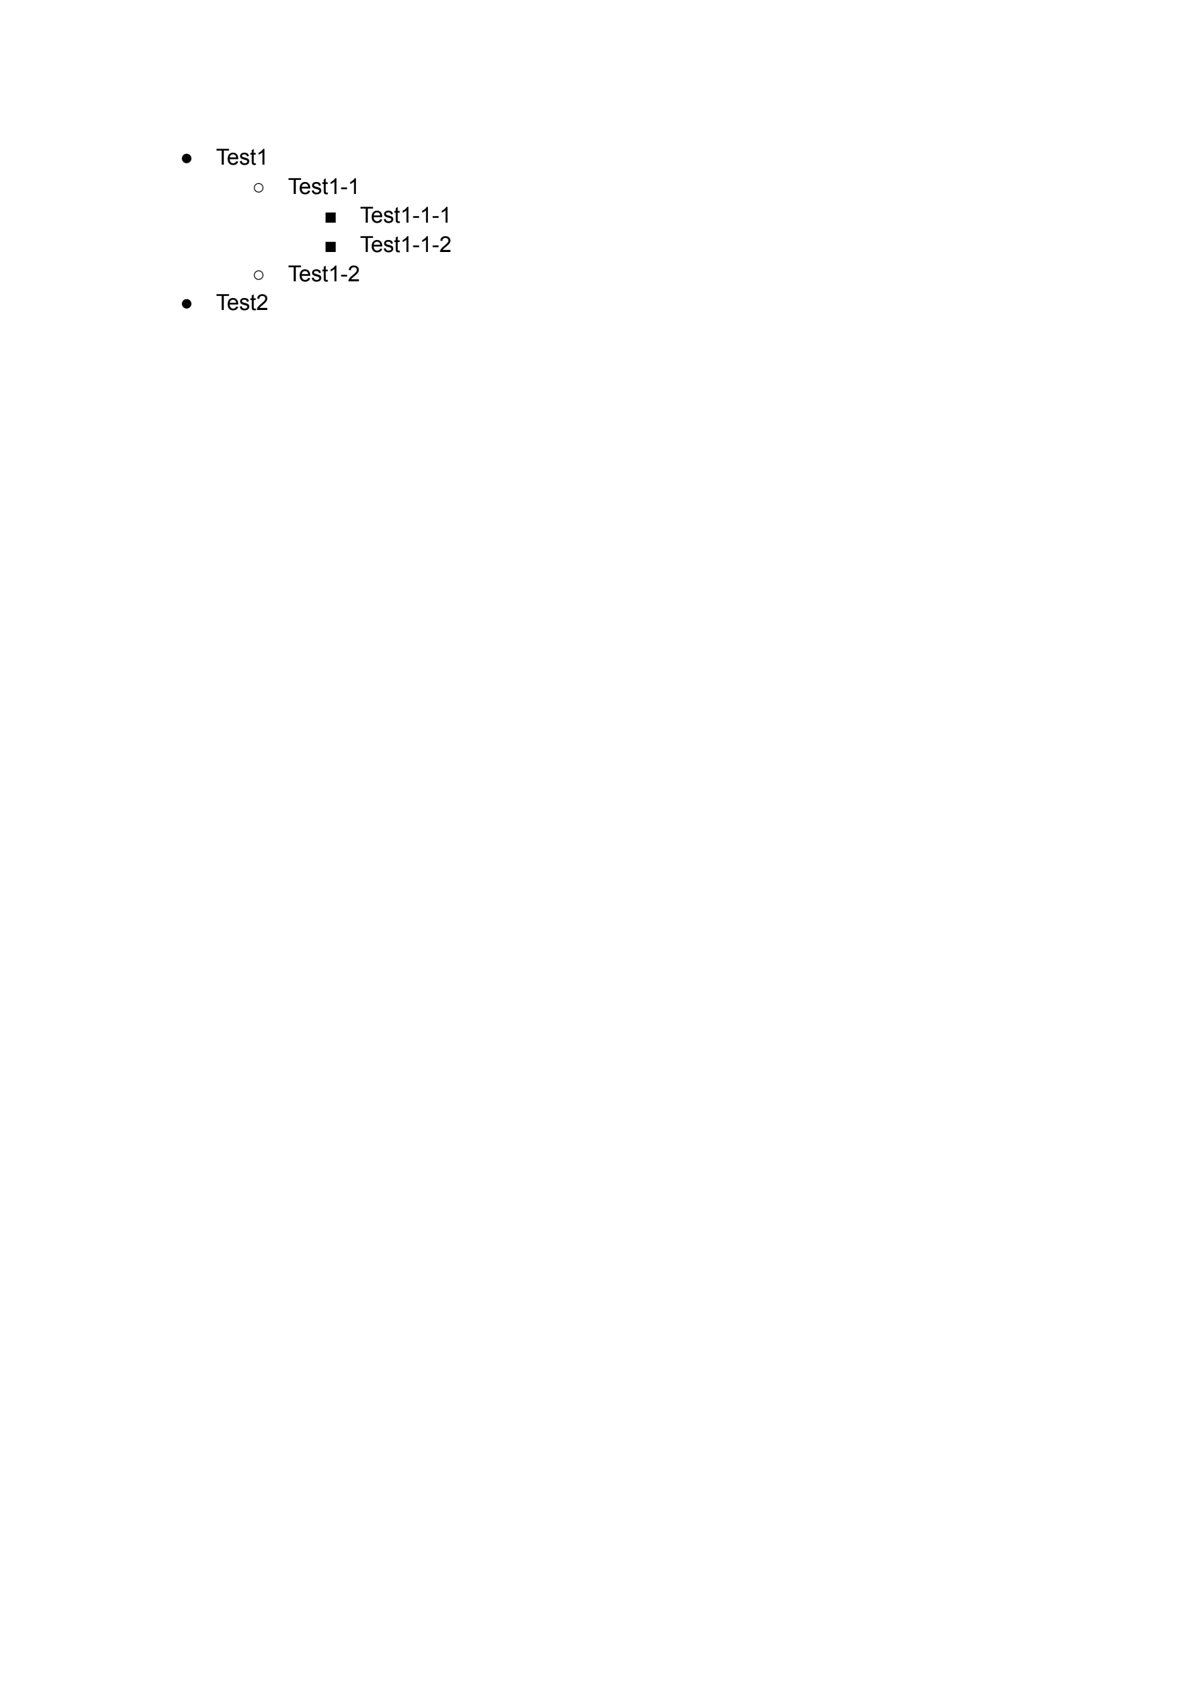

In [7]:
document.pages

## Cropping Image Part

In [8]:
for text in result.document.texts:
    print(text)

self_ref='#/texts/0' parent=RefItem(cref='#/groups/0') children=[] label=<DocItemLabel.LIST_ITEM: 'list_item'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=90.0, t=767.5560302734375, r=137.3280029296875, b=757.8389892578125, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 7))] orig='● Test1' text='● Test1' enumerated=False marker='-'
self_ref='#/texts/1' parent=RefItem(cref='#/groups/0') children=[] label=<DocItemLabel.LIST_ITEM: 'list_item'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=126.0, t=753.010009765625, r=183.1020050048828, b=743.2930297851562, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 9))] orig='· Test1-1' text='· Test1-1' enumerated=False marker='-'
self_ref='#/texts/2' parent=RefItem(cref='#/groups/0') children=[] label=<DocItemLabel.LIST_ITEM: 'list_item'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=162.0, t=738.4639892578125, r=228.87600708007812, b=728.7459716796875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BO

[90.0, 767.5560302734375, 137.3280029296875, 757.8389892578125]
- self_ref='#/texts/0' parent=RefItem(cref='#/groups/0') children=[] label=<DocItemLabel.LIST_ITEM: 'list_item'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=90.0, t=767.5560302734375, r=137.3280029296875, b=757.8389892578125, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 7))] orig='● Test1' text='● Test1' enumerated=False marker='-'
'● Test1'
[0.15100671140939598, 0.09995369446815618, 0.23041611229813339, 0.08841326570850654]
[126.0, 753.010009765625, 183.1020050048828, 743.2930297851562]
- self_ref='#/texts/1' parent=RefItem(cref='#/groups/0') children=[] label=<DocItemLabel.LIST_ITEM: 'list_item'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=126.0, t=753.010009765625, r=183.1020050048828, b=743.2930297851562, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 9))] orig='· Test1-1' text='· Test1-1' enumerated=False marker='-'
'· Test1-1'
[0.21140939597315436, 0.11722918077

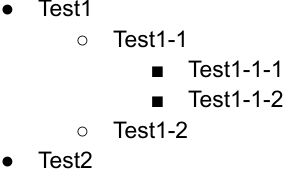

In [10]:
# Try Getting bbox
from core.reader.image_utils import crop_image

def _convert_bbox_bl_tl(
    bbox: list[float], page_width: int, page_height: int
) -> list[float]:
    """Convert bbox from bottom-left to top-left"""
    x0, y0, x1, y1 = bbox
    return [
        x0 / page_width,
        (page_height - y1) / page_height,
        x1 / page_width,
        (page_height - y0) / page_height,
    ]

page_width = document.pages[1].size.width
page_height = document.pages[1].size.height
bboxes = []
for text in result.document.texts:
    bbox = [
        text.prov[0].bbox.l,
        text.prov[0].bbox.t,
        text.prov[0].bbox.r,
        text.prov[0].bbox.b,
    ]
    print(bbox)
    bbox = _convert_bbox_bl_tl(bbox, page_width, page_height)
    print(text.marker, text)
    print(repr(text.text))
    print(bbox)
    bboxes.append(bbox)
    
all_lefts   = [bb[0] for bb in bboxes]
all_tops    = [bb[1] for bb in bboxes]
all_rights  = [bb[2] for bb in bboxes]
all_bottoms = [bb[3] for bb in bboxes]

# # Compute the aggregate bounding box
aggregated_bbox = {
    "l": min(all_lefts),
    "t": max(all_tops),
    "r": max(all_rights),
    "b": min(all_bottoms)
}
print(aggregated_bbox)


bbox = [aggregated_bbox["l"], aggregated_bbox["t"], aggregated_bbox["r"], aggregated_bbox["b"]]
# bbox = _convert_bbox_bl_tl(bbox, page_width, page_height)
img = crop_image(Path(file_path), bbox, 0)
img

In [67]:
def _combine_list_text(items, ordered: bool = False) -> str:
    """Restore list hierarchy based on bbox.l (left) coordinates."""
    
    def _is_item_inner(last: float, current: float) -> bool:
        """
        Returns True if `current` (the new item's indentation) is 
        strictly greater (i.e., 'further right') than `last`.
        """
        # If dealing with sub-1.0 floats (scaled coordinates),
        # multiply them up so the comparison is still valid.
        if last < 1 and current < 1:
            last   *= 100
            current *= 100
        return current > last
    
    indent_stack = []
    texts        = []

    for item in items:
        marker   = item.marker
        bbox_obj = item.prov[0].bbox
        l        = bbox_obj.l

        # If the stack is empty, this is the first item at depth 0.
        if not indent_stack:
            indent_stack.append(l)
            depth = 0
            texts.append("\t"*depth + f"{marker} {item.text}")
        else:
            # If this new item is 'further right' than the previous, it goes deeper.
            if _is_item_inner(indent_stack[-1], l):
                indent_stack.append(l)
                # depth is length of stack - 1 since we started from zero
                depth = len(indent_stack) - 1
                texts.append("\t"*depth + f"{marker} {item.text}")
            else:
                # Otherwise, we go back out (pop) until it's valid or stack is empty.
                while indent_stack and not _is_item_inner(indent_stack[-1], l):
                    indent_stack.pop()
                
                # Now we are at the correct "outer" level (or at root).
                indent_stack.append(l)
                depth = len(indent_stack) - 1
                texts.append("\t"*depth + f"{marker} {item.text}")

    return "\n".join(texts)

text = _combine_list_text(result.document.texts)
print(text)

- ● Test1
	- · Test1-1
		- ■ Test1-1-1
		- ■ Test1-1-2
	- · Test1-2
- ● Test2


In [15]:
import os

import pdfplumber
from bs4 import BeautifulSoup
from pdf2image import convert_from_path
from pdfplumber.utils import extract_text, get_bbox_overlap, obj_to_bbox

import pandas as pd

all_pages = []
with pdfplumber.open(file_path) as pdf:
    for page in pdf.pages:
        filtered_page = page
        chars = filtered_page.chars
    page_text = extract_text(chars, layout=True)
    print(repr(page_text))

'  ●  Test1\n       ○  Test1-1\n            ■  Test1-1-1\n            ■  Test1-1-2\n       ○  Test1-2\n\n  ●  Test2'
